In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

<Axes: >

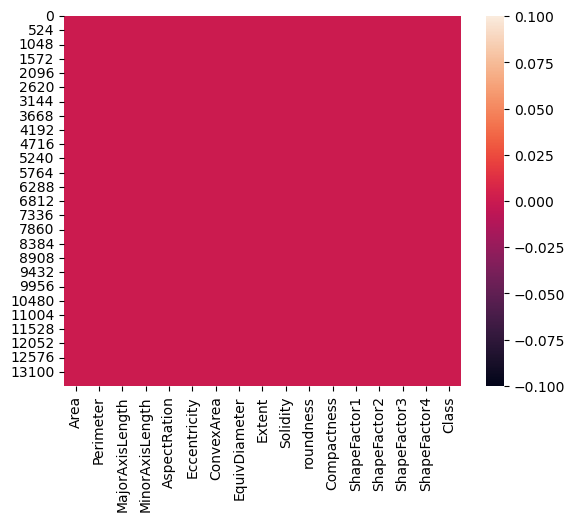

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.shape

(13611, 17)

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Class
['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [9]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value")


No missing value


In [10]:
for column in df.columns:
    print(column,df[column].nunique())

Area 12011
Perimeter 13416
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
EquivDiameter 12011
Extent 13535
Solidity 13526
roundness 13543
Compactness 13543
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13543
Class 7


In [11]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['Class']

In [12]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Class and number of categories are 7


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Class'] = labelencoder.fit_transform(df['Class'])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


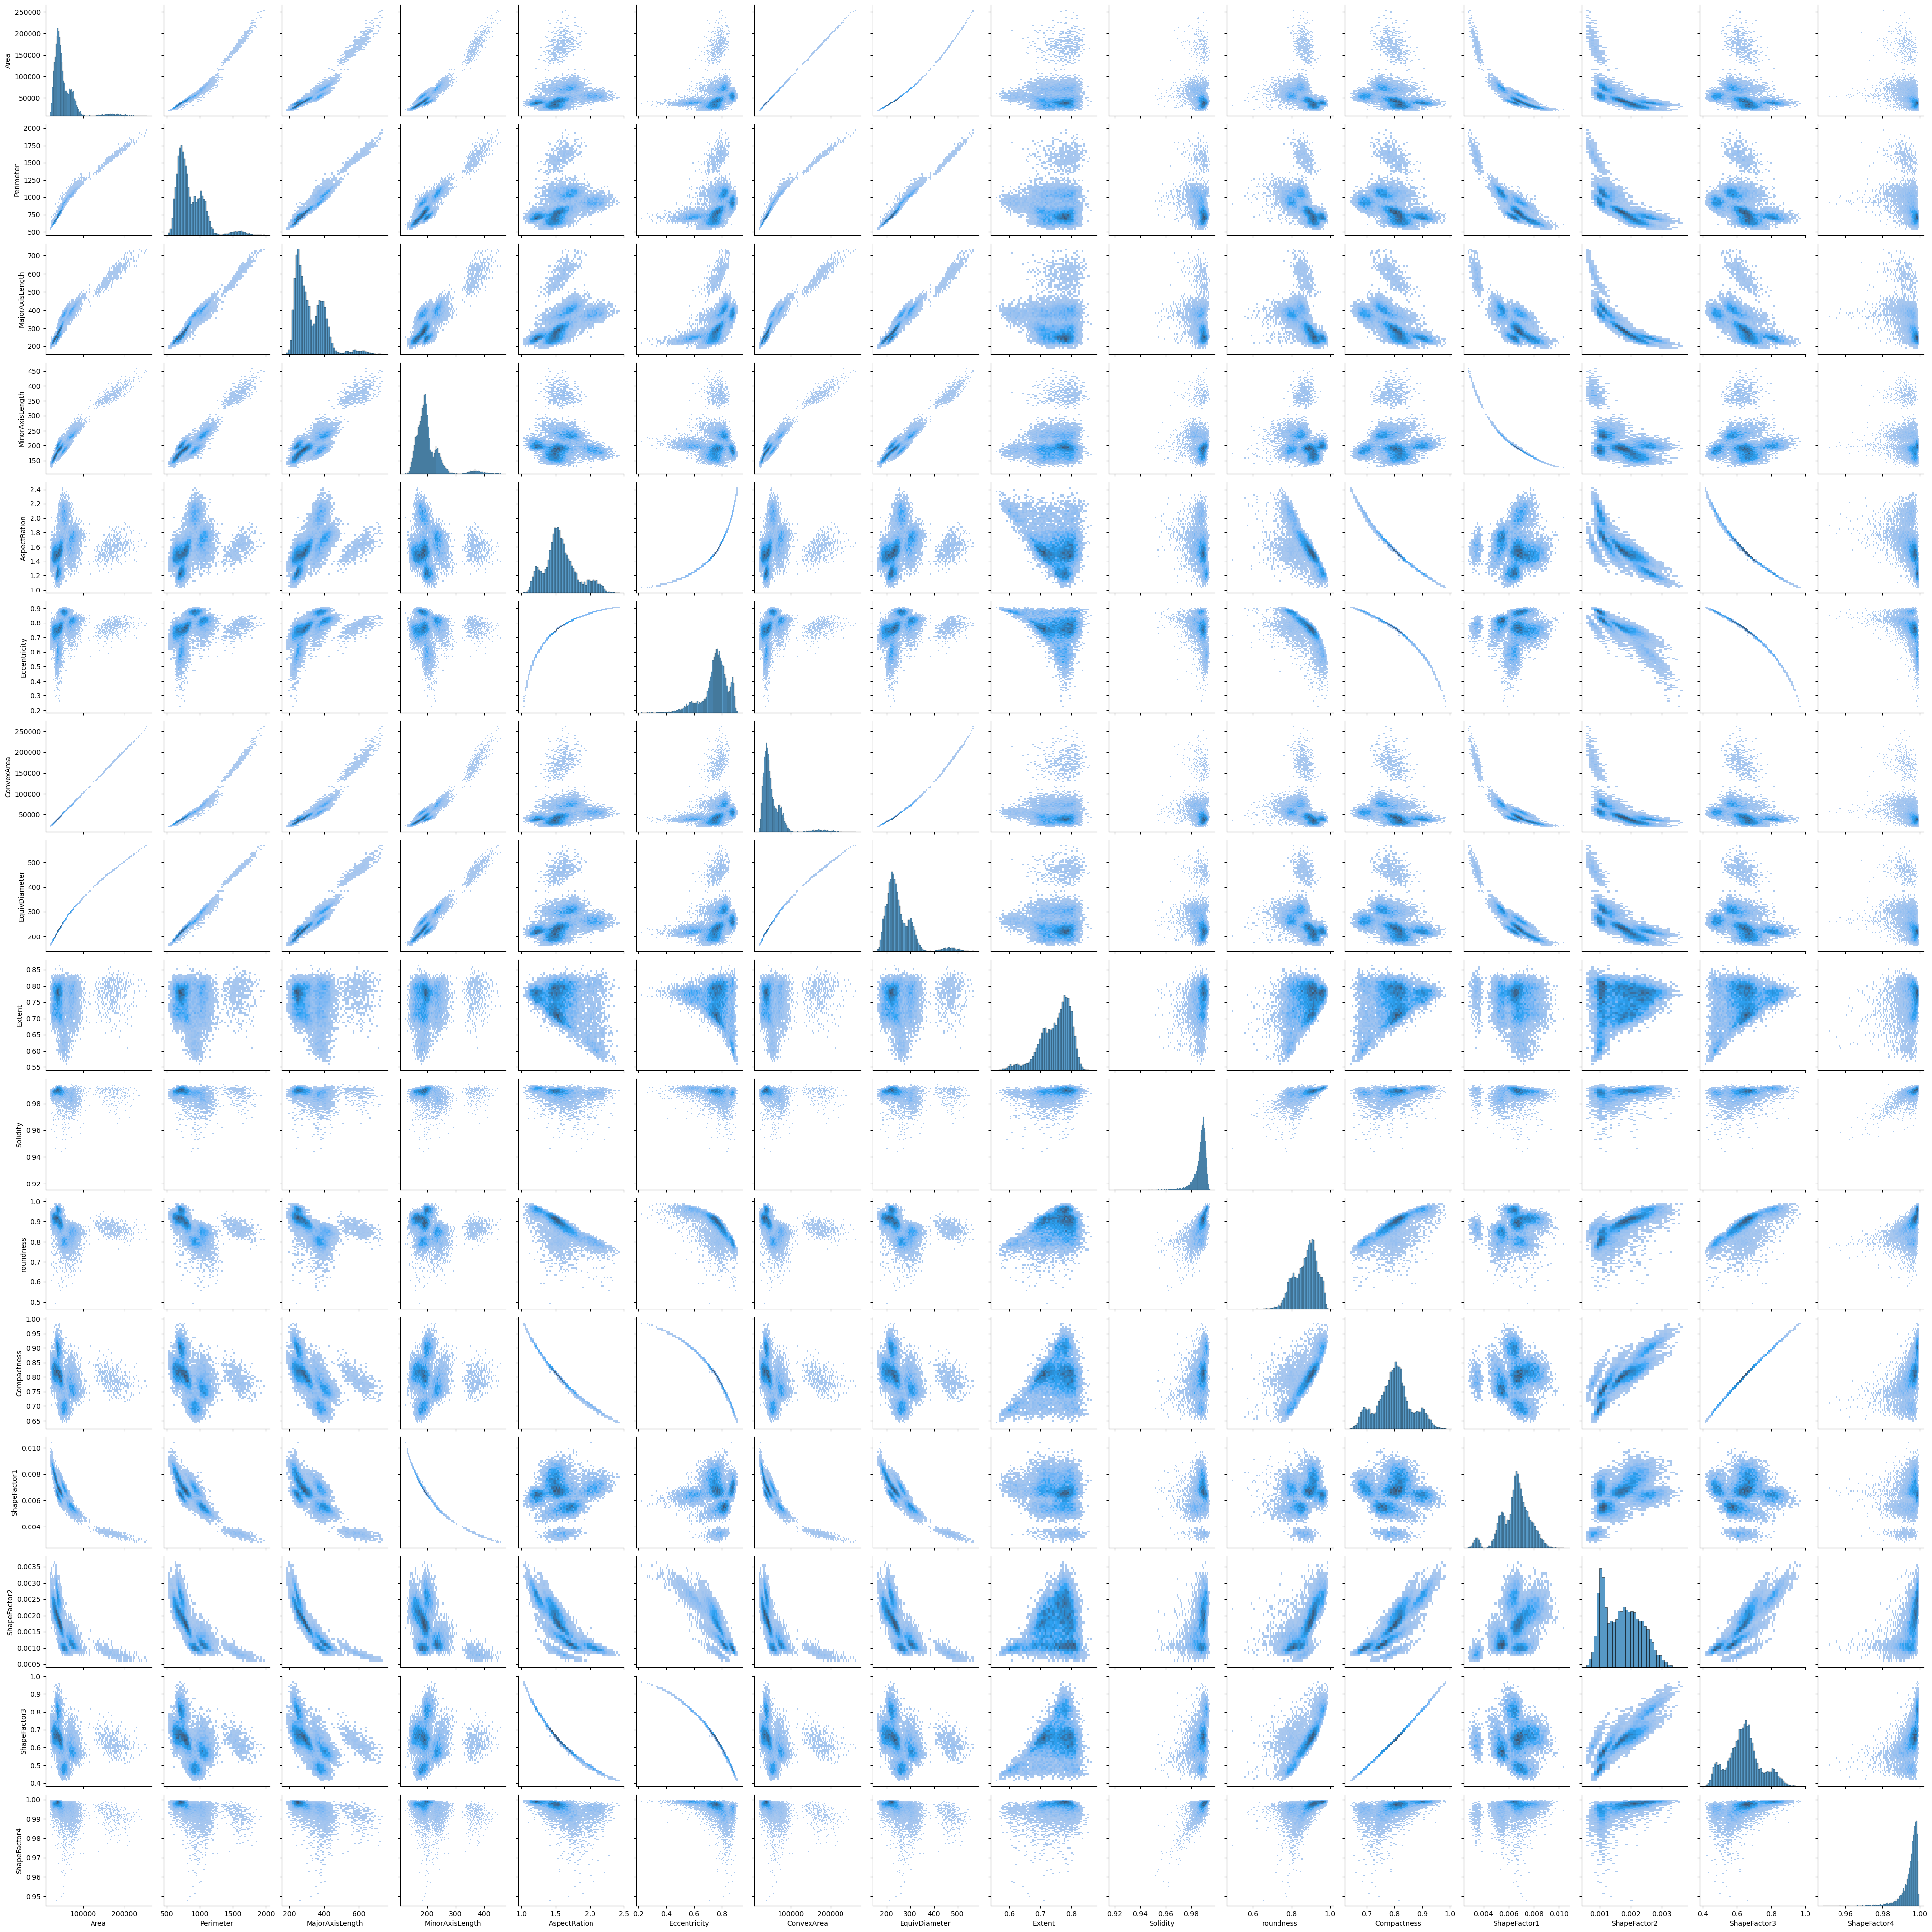

In [13]:
sns.pairplot(df,kind="hist")

C:\Users\priya\AppData\Local\Temp\ipykernel_24508\3958722291.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


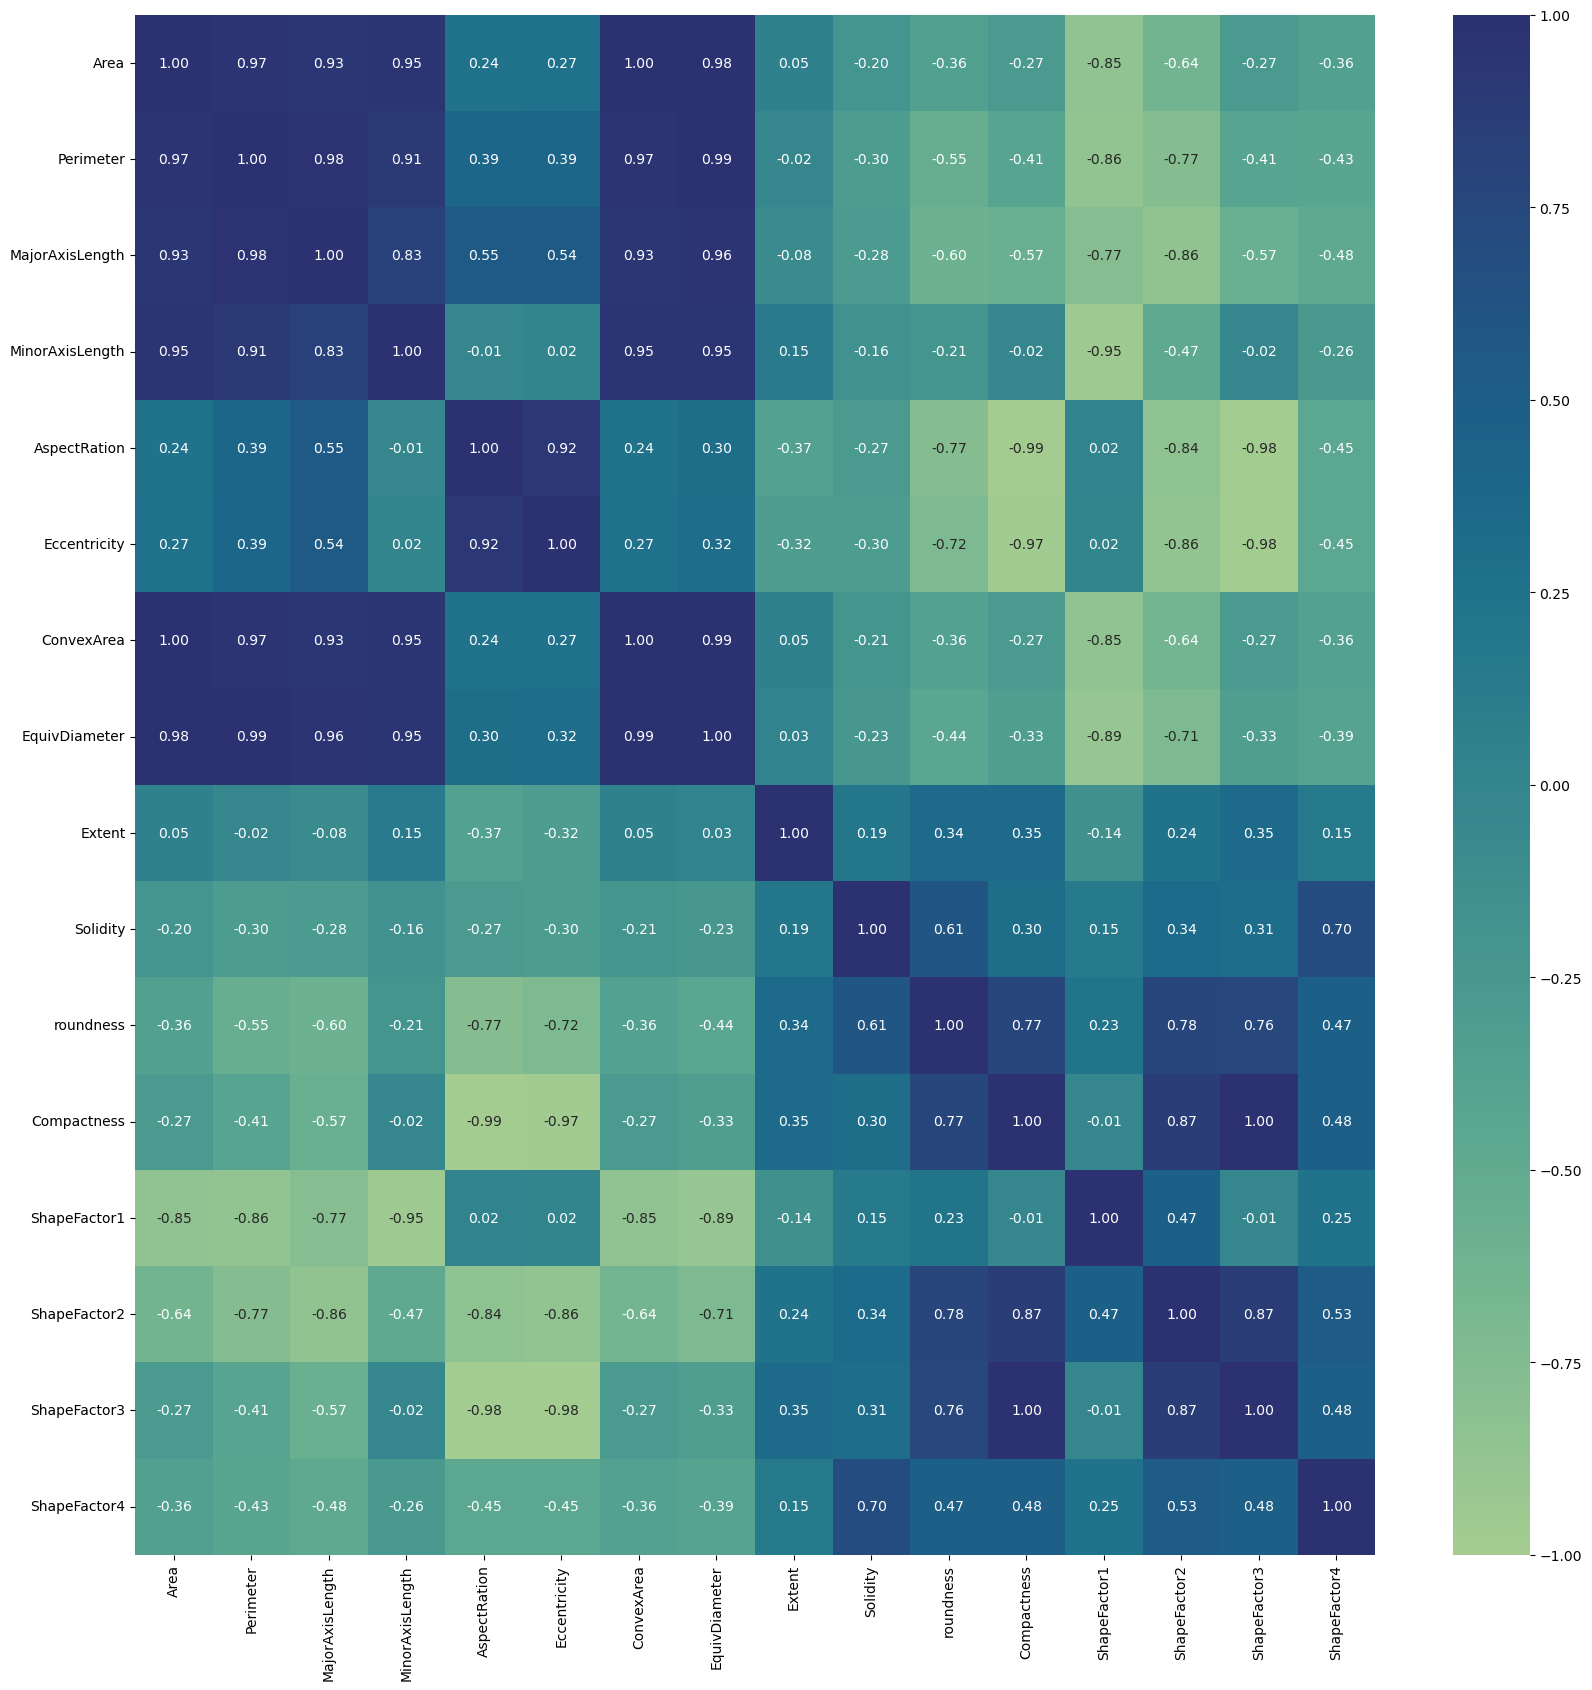

In [14]:
#Display the correlation between attributes or features
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "crest",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

In [16]:
#split between target variable and rest of the features
X = df.drop(['Class'], axis=1)

y = df['Class']

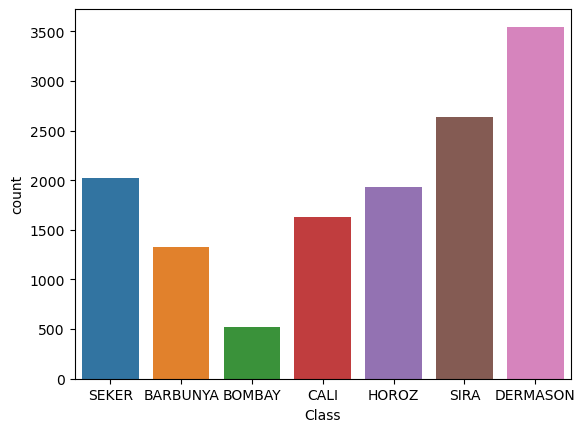

In [17]:
sns.countplot(x=y, data=df)
plt.show()

In [18]:
print(y)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object


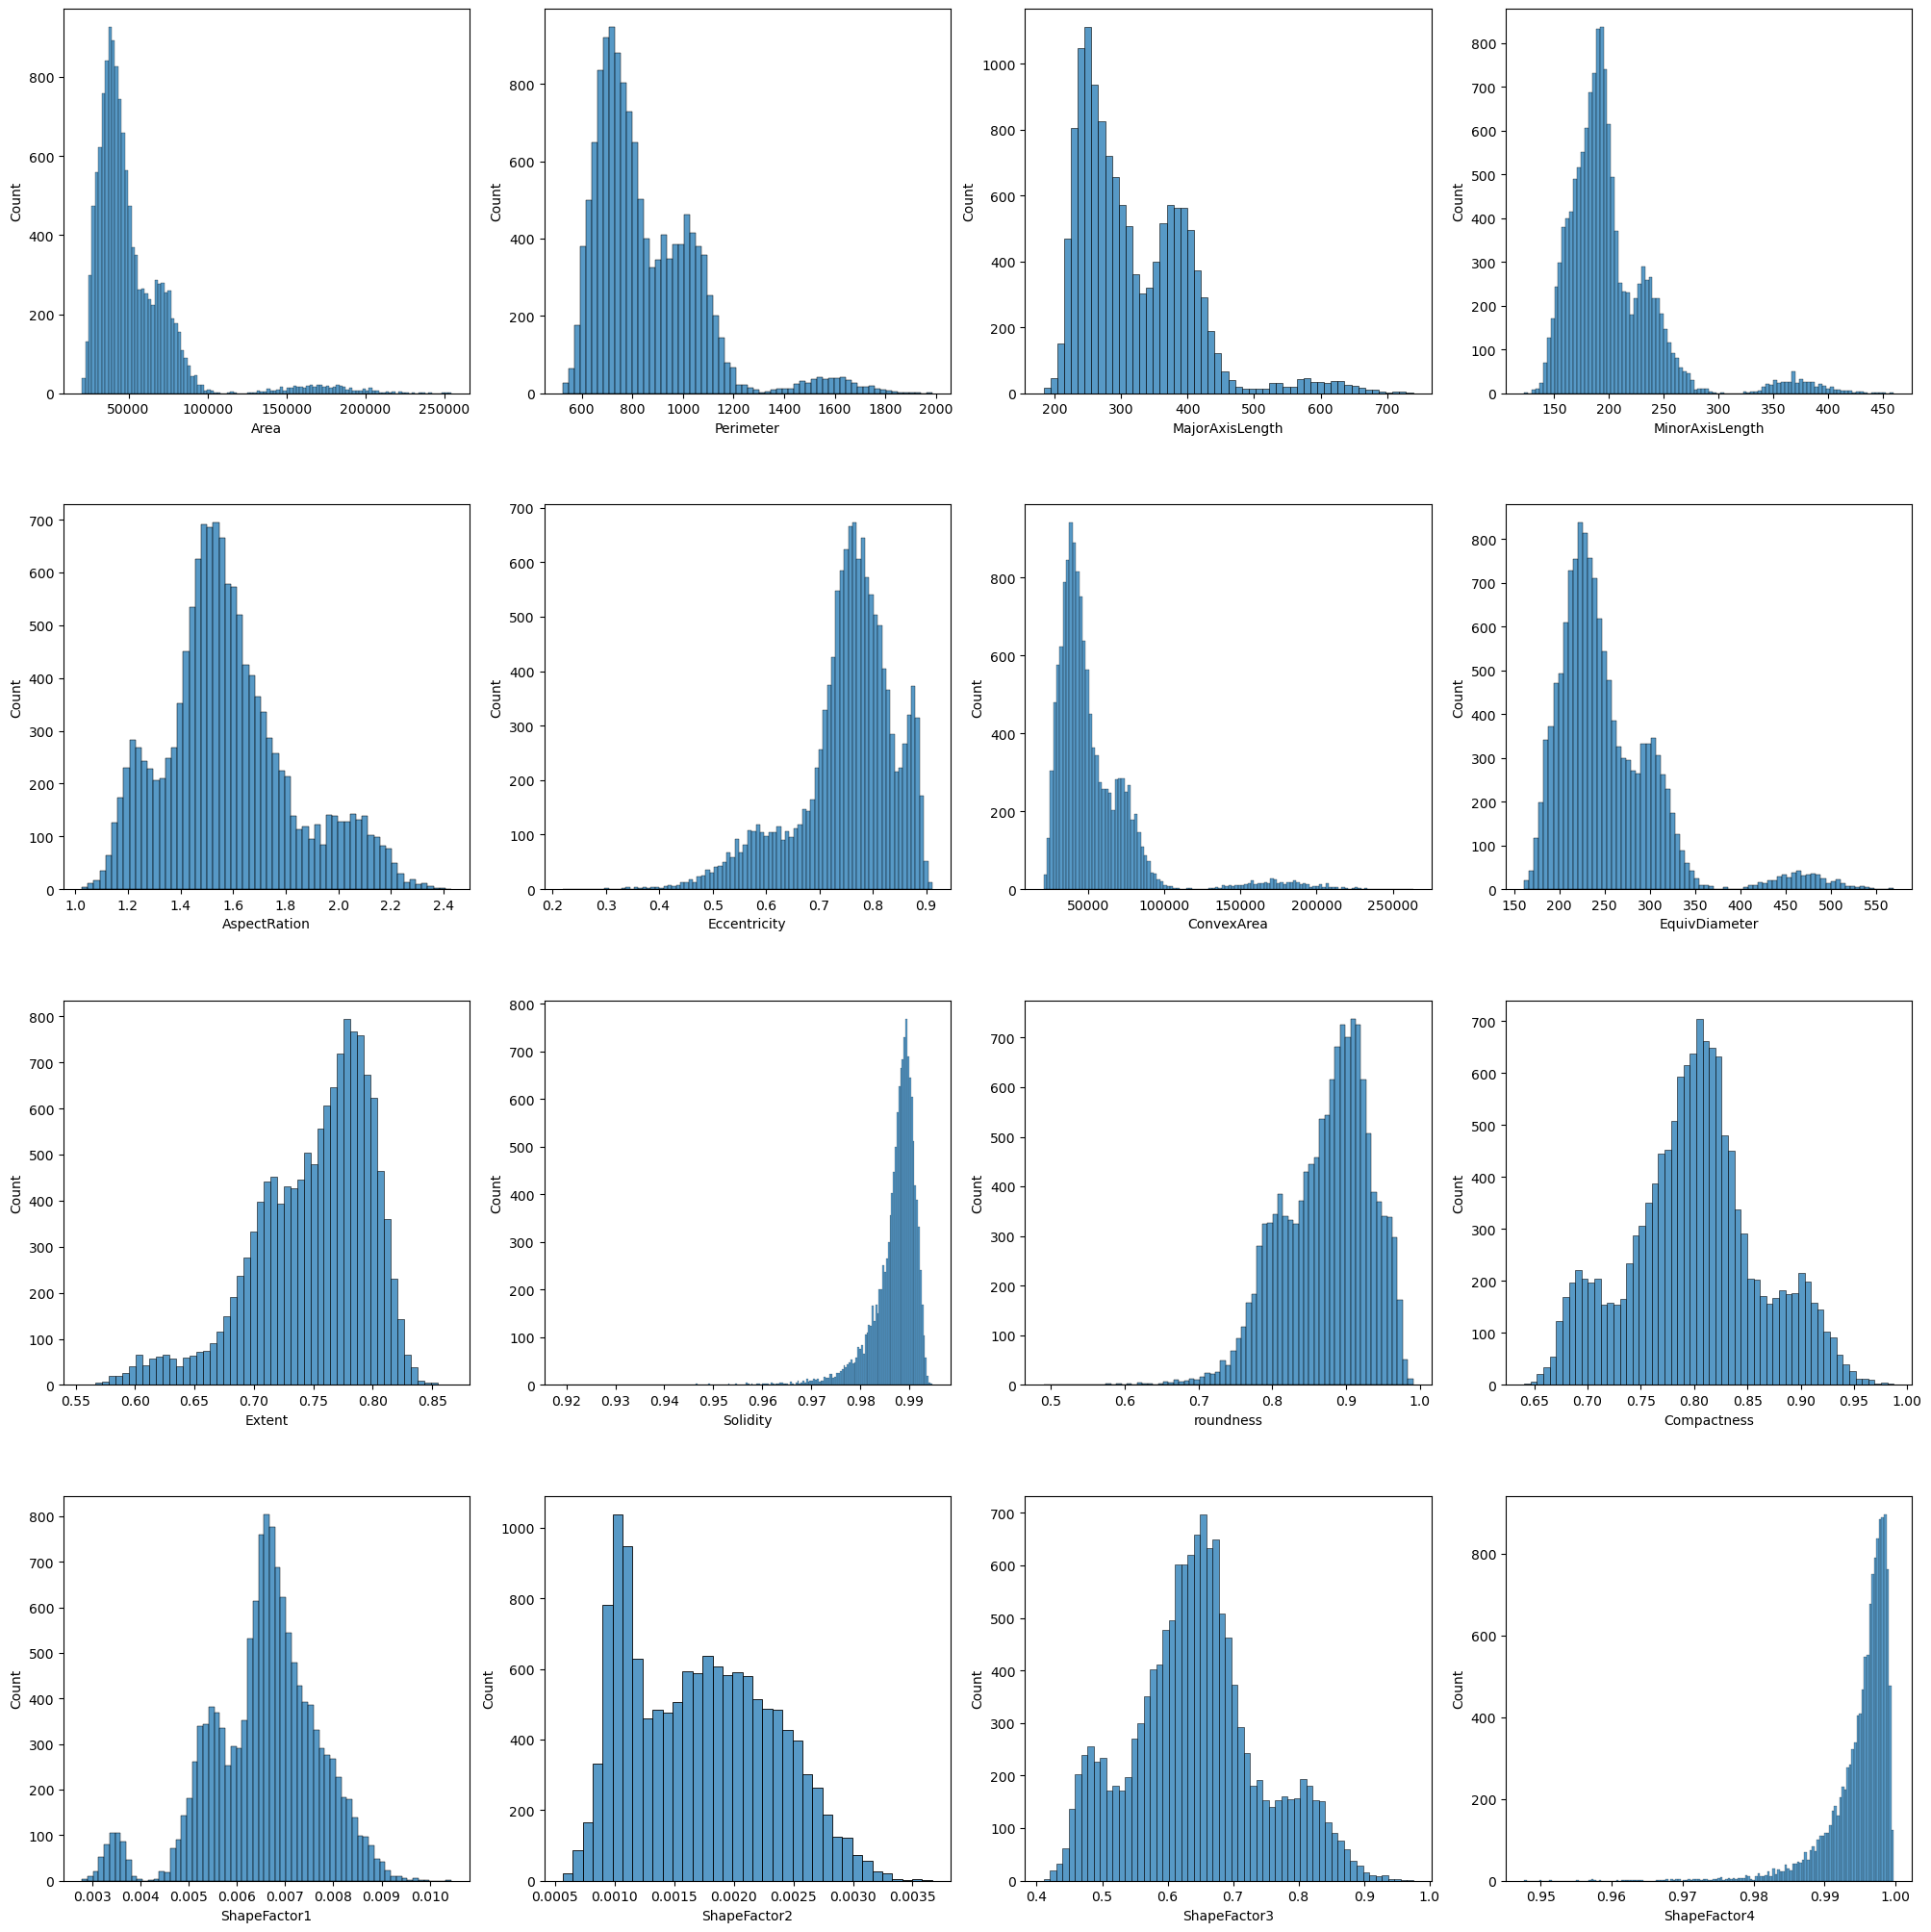

In [19]:
# Plot features value distribution
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

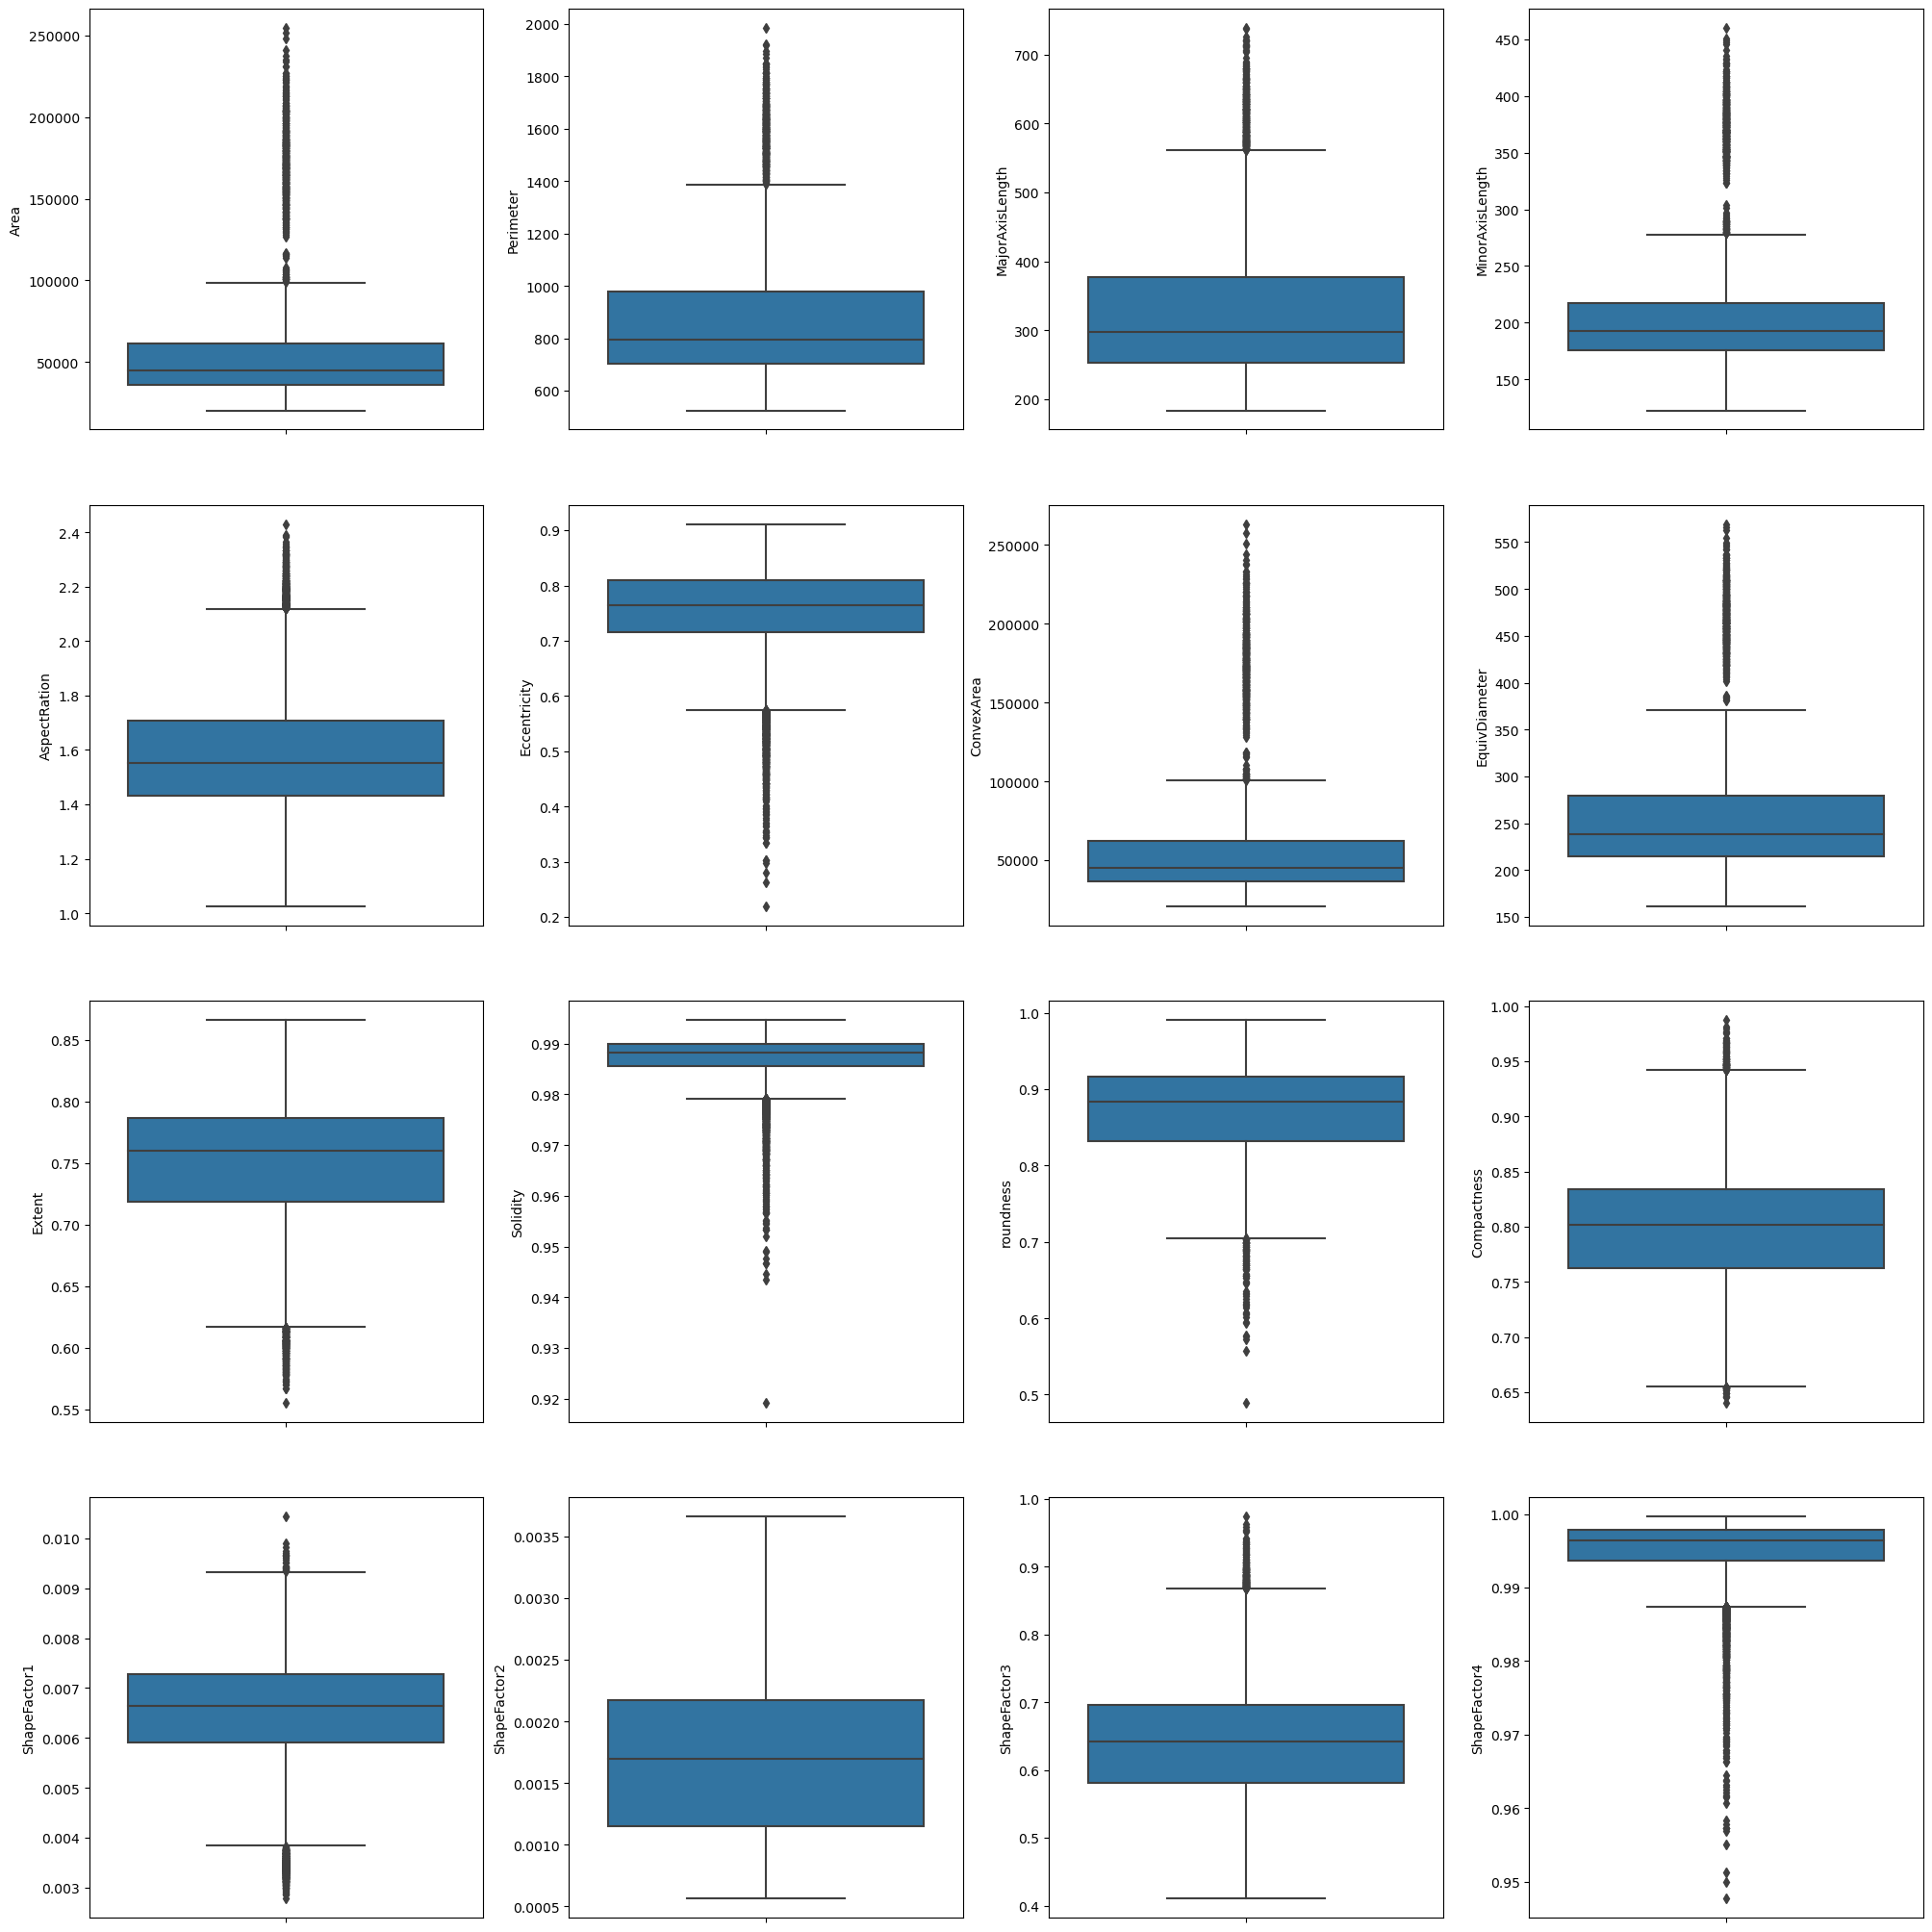

In [23]:
# Display boxplots per feature
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
idx = 0
axs = axs.flatten()
for k, v in X.items():
    sns.boxplot(y = k, data = X, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

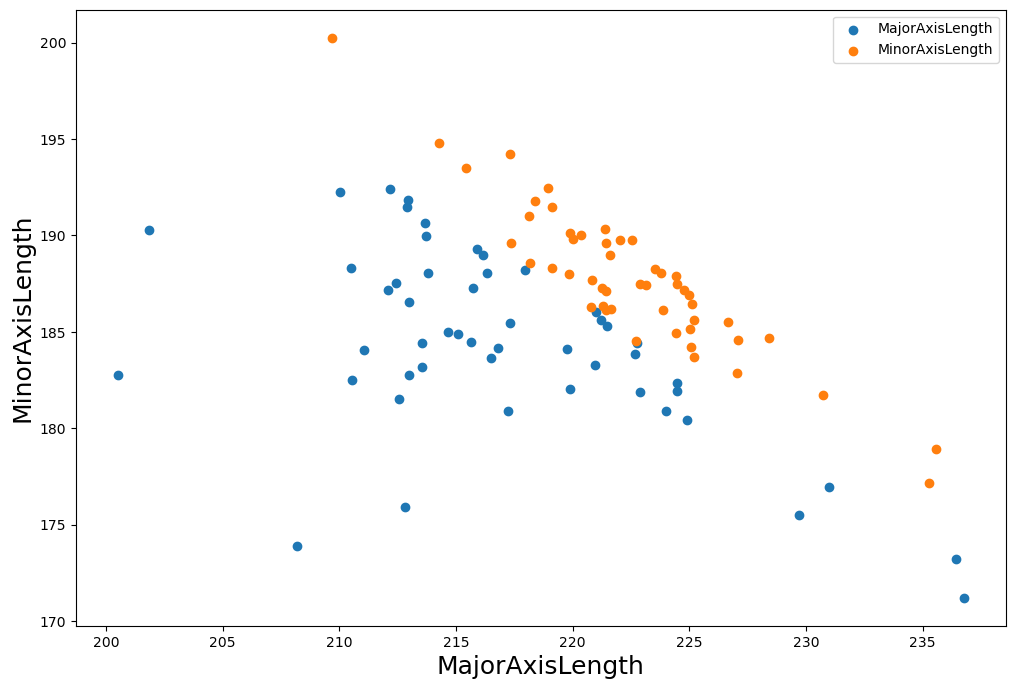

In [21]:
#plotting the features 'MajorAxisLength' and 'MinorAxisLength' of the drybeans
plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['MajorAxisLength'], df[:50]['MinorAxisLength'], label='MajorAxisLength')
plt.scatter(df[50:100]['MajorAxisLength'], df[50:100]['MinorAxisLength'], label='MinorAxisLength')
plt.xlabel('MajorAxisLength', fontsize=18)
plt.ylabel('MinorAxisLength', fontsize=18)
plt.legend()

plt.show()

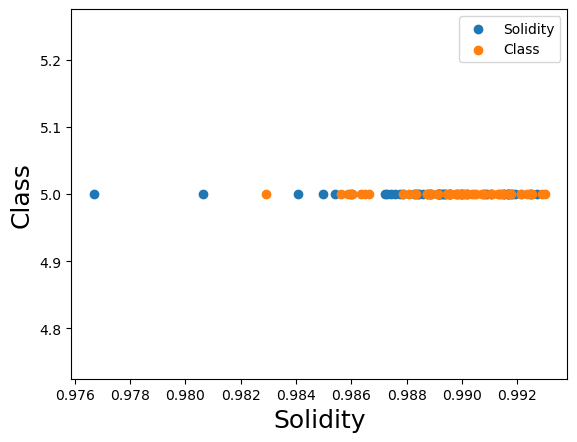

In [25]:

#plotting the features 'Solidity' and 'Class' of the drybeansplt.figure(figsize=(12, 8))
plt.scatter(df[:50]['Solidity'], df[:50]['Class'], label='Solidity')
plt.scatter(df[50:100]['Solidity'], df[50:100]['Class'], label='Class')
plt.xlabel('Solidity', fontsize=18)
plt.ylabel('Class', fontsize=18)
plt.legend()

plt.show()

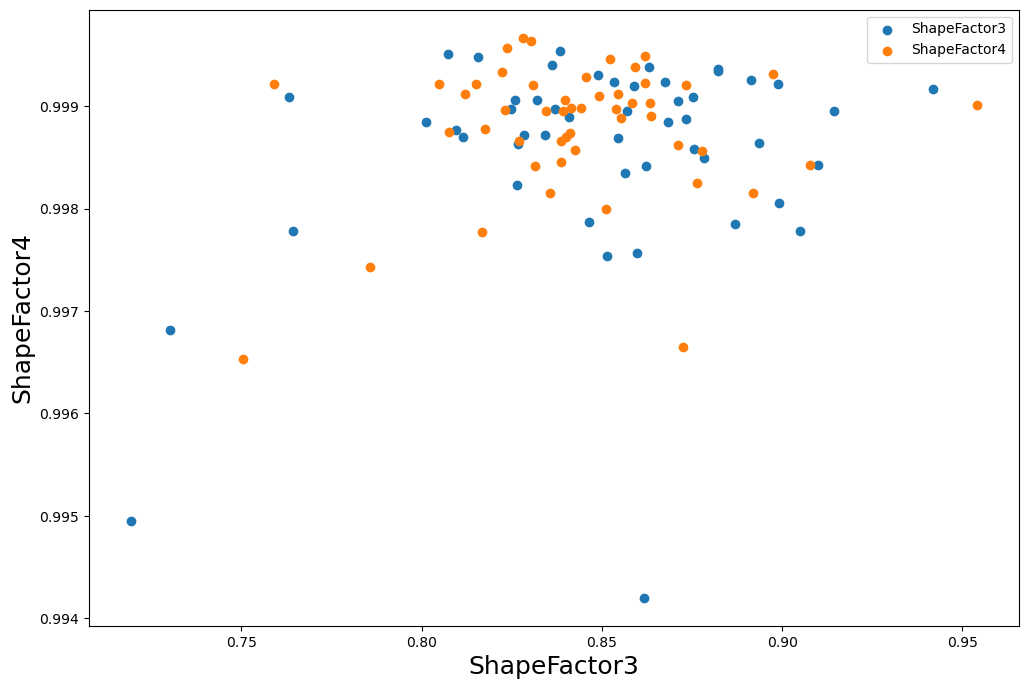

In [26]:
#plotting the features 'ShapeFactor3' and 'ShapeFactor4' of the drybeans
plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['ShapeFactor3'], df[:50]['ShapeFactor4'], label='ShapeFactor3')
plt.scatter(df[50:100]['ShapeFactor3'], df[50:100]['ShapeFactor4'], label='ShapeFactor4')
plt.xlabel('ShapeFactor3', fontsize=18)
plt.ylabel('ShapeFactor4', fontsize=18)
plt.legend()

plt.show()

In [28]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9527, 16) (9527,)
(4084, 16) (4084,)


In [29]:
X_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
1488,42339,741.226,260.199331,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383
2611,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352
749,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235
99,33143,648.385,222.526310,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465
11298,29925,647.570,237.714031,161.004848,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521


In [31]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11380,30210,651.194,254.800257,151.387457,1.683100,0.804360,30507,196.123855,0.788608,0.990265,0.895241,0.769716,0.008434,0.001826,0.592463,0.997174
10592,26989,603.446,209.236366,164.968662,1.268340,0.615122,27389,185.373844,0.724887,0.985396,0.931365,0.885954,0.007753,0.002946,0.784915,0.995539
3130,79508,1120.351,410.471774,248.306459,1.653085,0.796279,80728,318.170913,0.706889,0.984888,0.795999,0.775135,0.005163,0.001150,0.600834,0.993230
5861,47394,880.106,365.540272,165.751428,2.205352,0.891286,48081,245.649985,0.624921,0.985712,0.768888,0.672019,0.007713,0.000970,0.451609,0.995958
3405,145339,1465.758,543.258451,342.468755,1.586301,0.776273,147256,430.175967,0.695958,0.986982,0.850095,0.791844,0.003738,0.000906,0.627017,0.994638


In [39]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11380,30210,651.194,254.800257,151.387457,1.683100,0.804360,30507,196.123855,0.788608,0.990265,0.895241,0.769716,0.008434,0.001826,0.592463,0.997174
10592,26989,603.446,209.236366,164.968662,1.268340,0.615122,27389,185.373844,0.724887,0.985396,0.931365,0.885954,0.007753,0.002946,0.784915,0.995539
3130,79508,1120.351,410.471774,248.306459,1.653085,0.796279,80728,318.170913,0.706889,0.984888,0.795999,0.775135,0.005163,0.001150,0.600834,0.993230
5861,47394,880.106,365.540272,165.751428,2.205352,0.891286,48081,245.649985,0.624921,0.985712,0.768888,0.672019,0.007713,0.000970,0.451609,0.995958
3405,145339,1465.758,543.258451,342.468755,1.586301,0.776273,147256,430.175967,0.695958,0.986982,0.850095,0.791844,0.003738,0.000906,0.627017,0.994638


In [32]:
from sklearn.tree import DecisionTreeClassifier

# np.random.seed(42)

dfclf = DecisionTreeClassifier() 
dfclf.fit(X_train, y_train)
dfclf.score(X_test, y_test)

0.8905484818805093

In [33]:
# DecisionTreeClassifier model with criterion gini index
dfclf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# fit the model
dfclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
y_pred = dfclf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7718


In [34]:
#Hyperparameter tuning

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [37]:
# Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# What does this GridSearchCV does? We will repeatedly see this in the future.

param = {
    'criterion': ['gini'],
    'max_depth': [i for i in range(20, 101, 10)], # [30, 50, 60, 100]
    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid.fit(X_train, y_train)
print('\n Best DT Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best DT Classifier: {'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} 
\Best Score: 0.7626728266027976


In [38]:
#check overfitting and underfitting

In [83]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dfclf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dfclf.score(X_test, y_test)))

Training set score: 0.7787
Test set score: 0.7718


[Text(0.5, 0.875, 'x[2] <= 280.397\ngini = 0.827\nsamples = 9527\nvalue = [927, 361, 1151, 2503, 1340, 1408, 1837]'),
 Text(0.25, 0.625, 'x[12] <= 0.007\ngini = 0.539\nsamples = 4031\nvalue = [4, 0, 0, 2387, 9, 1297, 334]'),
 Text(0.125, 0.375, 'x[14] <= 0.727\ngini = 0.234\nsamples = 1426\nvalue = [4, 0, 0, 74, 1, 1241, 106]'),
 Text(0.0625, 0.125, 'gini = 0.588\nsamples = 166\nvalue = [0, 0, 0, 47, 1, 26, 92]'),
 Text(0.1875, 0.125, 'gini = 0.07\nsamples = 1260\nvalue = [4, 0, 0, 27, 0, 1215, 14]'),
 Text(0.375, 0.375, 'x[1] <= 708.068\ngini = 0.203\nsamples = 2605\nvalue = [0, 0, 0, 2313, 8, 56, 228]'),
 Text(0.3125, 0.125, 'gini = 0.084\nsamples = 2033\nvalue = [0, 0, 0, 1945, 5, 52, 31]'),
 Text(0.4375, 0.125, 'gini = 0.467\nsamples = 572\nvalue = [0, 0, 0, 368, 3, 4, 197]'),
 Text(0.75, 0.625, 'x[14] <= 0.531\ngini = 0.789\nsamples = 5496\nvalue = [923, 361, 1151, 116, 1331, 111, 1503]'),
 Text(0.625, 0.375, 'x[3] <= 215.311\ngini = 0.136\nsamples = 1288\nvalue = [6, 6, 75, 1, 11

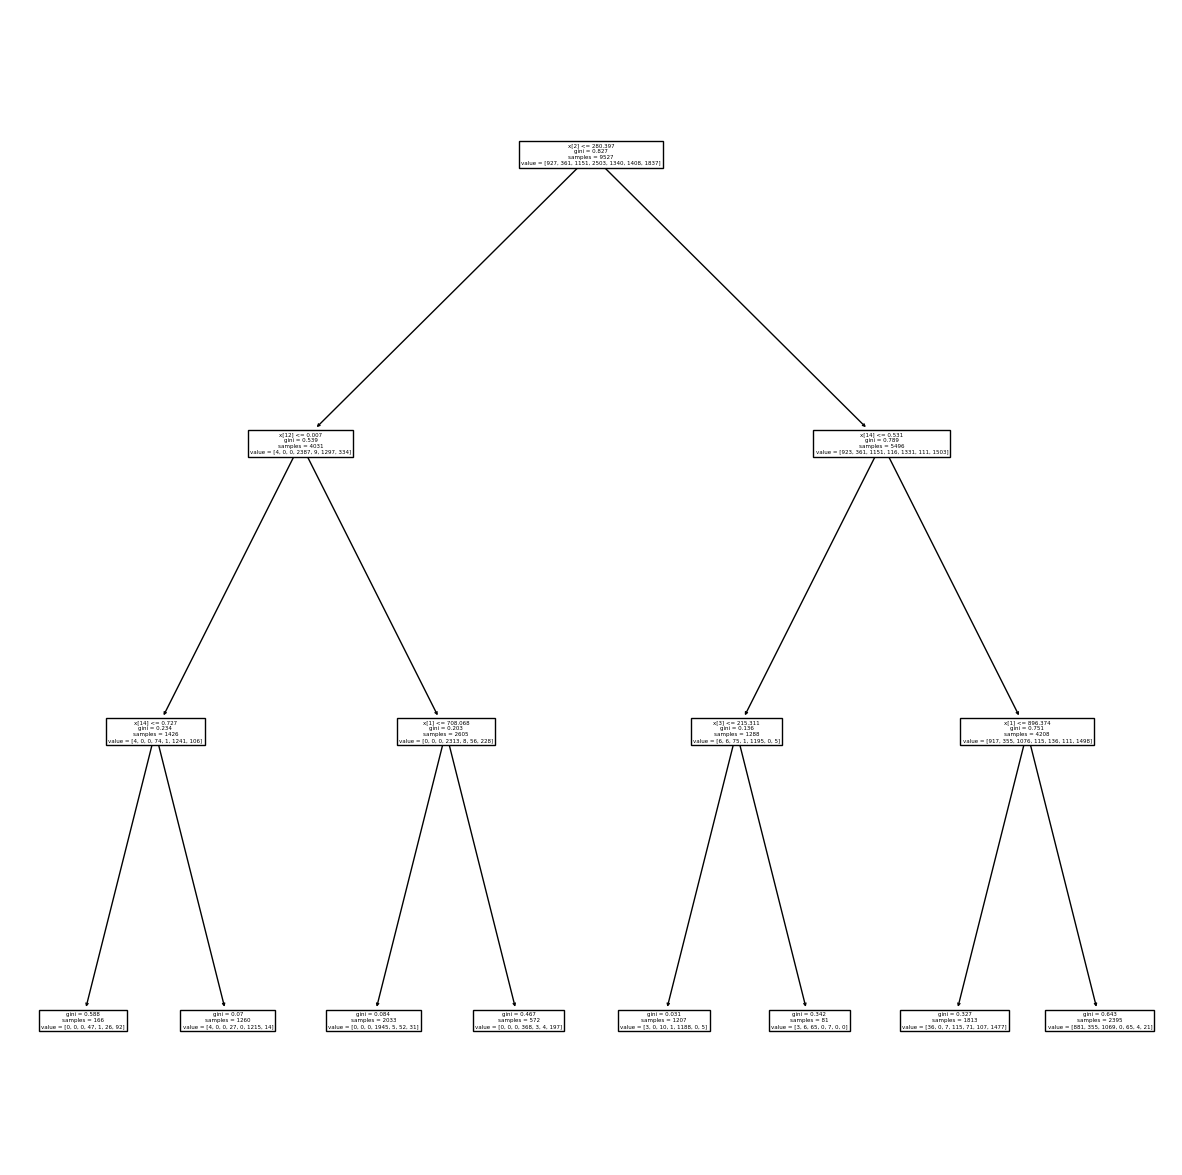

In [84]:
plt.figure(figsize=(15,15))
from sklearn import tree

tree.plot_tree(dfclf)

In [85]:
from sklearn.tree import export_text
r = export_text(dfclf)
print(r)

|--- feature_2 <= 280.40
|   |--- feature_12 <= 0.01
|   |   |--- feature_14 <= 0.73
|   |   |   |--- class: 6
|   |   |--- feature_14 >  0.73
|   |   |   |--- class: 5
|   |--- feature_12 >  0.01
|   |   |--- feature_1 <= 708.07
|   |   |   |--- class: 3
|   |   |--- feature_1 >  708.07
|   |   |   |--- class: 3
|--- feature_2 >  280.40
|   |--- feature_14 <= 0.53
|   |   |--- feature_3 <= 215.31
|   |   |   |--- class: 4
|   |   |--- feature_3 >  215.31
|   |   |   |--- class: 2
|   |--- feature_14 >  0.53
|   |   |--- feature_1 <= 896.37
|   |   |   |--- class: 6
|   |   |--- feature_1 >  896.37
|   |   |   |--- class: 2



In [87]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

In [88]:
print(confusion)

[[  0   0 375   0   0   1  19]
 [  0   0 161   0   0   0   0]
 [  0   0 470   0   6   1   2]
 [  0   0   0 947   0  15  81]
 [  0   0  34   6 524   0  24]
 [  0   0   4  42   0 518  55]
 [  0   0   9  91   2   4 693]]


Text(0.5, 1.0, 'Confusion Matrix ')

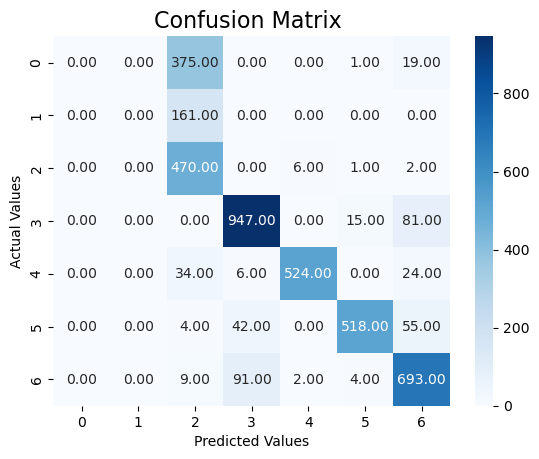

In [90]:
cm = confusion_matrix(y_test, y_pred)
confusion_plot = sns.heatmap(cm, annot=True, cmap='Blues',fmt=".2f")
confusion_plot.set_xlabel('Predicted Values')
confusion_plot.set_ylabel('Actual Values')
confusion_plot.set_title('Confusion Matrix ', size=16)


In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       395
           1       0.00      0.00      0.00       161
           2       0.45      0.98      0.61       479
           3       0.87      0.91      0.89      1043
           4       0.98      0.89      0.94       588
           5       0.96      0.84      0.89       619
           6       0.79      0.87      0.83       799

    accuracy                           0.77      4084
   macro avg       0.58      0.64      0.59      4084
weighted avg       0.72      0.77      0.73      4084



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Bagging(Bootstrap Aggregating): BaggingClassifier

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, bootstrap=True)
dt_bag_clf.fit(X_train, y_train)

print("DecisionTree_BAG's training accuracy: %.2f%%" % (100 * dt_bag_clf.score(X_train, y_train)))
print("DecisionTree_BAG's test accuracy: %.2f%%" % (100 * dt_bag_clf.score(X_test, y_test)))

DecisionTree_BAG's training accuracy: 99.86%
DecisionTree_BAG's test accuracy: 92.09%


In [ ]:
#Boosting: AdaBoost

In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, bootstrap=True)
dt_bag_clf.fit(X_train, y_train)

print("DecisionTree_BAG's training accuracy: %.2f%%" % (100 * dt_bag_clf.score(X_train, y_train)))
print("DecisionTree_BAG's test accuracy: %.2f%%" % (100 * dt_bag_clf.score(X_test, y_test)))

DecisionTree_BAG's training accuracy: 99.83%
DecisionTree_BAG's test accuracy: 91.85%
